In [2]:
# Run this cell before beginning the exercises.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from IPython.display import YouTubeVideo
import sys

sys.path.append('../Modules')
from Guide import define, list_entries, list_notebooks, open_notebook

# Introduction

Hello Microlenser. I am your Guide. 

I'll keep this introduction brief, incase you are short on time. 

This notebook is going to take a liesurely stroll through the "basic" concepts of microlensing. This topic is complex and has a lot of naunce, so I propose we first familiarise ourselves with the scientific motivations, background information, and key discoveries (the stuff that doesn't make us want to bang our heads against the wall) and get to know each other a little. But if that doesn't sound like somthing you want to do, I'm not offended; I'm a notebook. 

Below is a list of the concepts we will cover here. Feel free to skip to whatever point makes you feel good. Or skip this whole notebook by going straight to the Next Steps section.

## Contents
- [What is Microlensing?](#1-what-is-microlensing)
- [What is it used for?](#2-what-is-it-used-for)
  - [Exoplanets](#21-exoplanets)
  - [Brown Dwarf](#22-brown-dwarf)
  - [Black Holes and other Remnants](#23-black-holes-and-other-remnants)
  - [Stellar Population Models](#24-stellar-population-models)
  - [Dark Matter](#25-dark-matter)
- [Microlensing Eras](#3-microlensing-eras)
- [Next Steps](#next-steps)



Great. Now that they're gone, let's meander a bit. This notebook will make use of a variety of media to keep it accessable and interesting for all users, as seen in the following section. And if you need some motivation, or dopamine throughout, take a look at the [checklist tool](http://localhost:8866/ProgressChecklist.ipynb) where you can tick off sections for this notebook as you complete them.



Gravitational lensing is a strange and fascinating phenomenon in astrophysics and a uniquely powerful tool for unveiling the secrets of the universe.  At its core, this phenomenon is rooted in Einstein's theory of general relativity. It occurs when the gravity of massive objects, such as galaxies, stars, planets, or dark matter, curves spacetime, distorting the path travelled by light as it passes by, as if the light were passing through a **lens**. This can make the objects producing this light (the **source**s) appear to be in locations they are not and as shapes they are not. If the visible source is approximately behind a simple lensing mass, as seen by an observer, the source will be observed as a magnified image, or images, of itself. These images will form about the [Einstein ring](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Einstein_ring&ved=2ahUKEwiFh_et4OOIAxU578kDHTPhAYwQFnoECBYQAQ&usg=AOvVaw2L-WOWW_yeDFzWYp_JfVWT) and will often appear stretched and curved. The radius of this ring, $\tilde{r}_E$, is dependent on the mass of the lens; a greater mass results in a larger Einstein ring.


The angular Einstein radius is defined by,

$$ \theta_{\rm E} =\left( \frac{4GM_{\rm L}}{c^2} \frac{D_{\rm LS}}{D_{\rm L} D_{\rm S}} \right){\frac{1}{2}}$$
$$ =\sqrt{M_{\rm L}\kappa\pi_{rel}}, $$

where $M_{\rm L}$ is the total mass of the lens system, $D_{\rm LS}$ is the distance from the lens plane to the source plane, $D_{\rm L}$ is the distance from the observer to the lens plane, $D_{\rm S}$ is the distance from the observer to the source plane, and $\kappa=4G/(c^2\rm{au})\sim8.14 \, \rm{mas}/M_\odot$. 

> Refer to [Microlensing Source](https://www.microlensing-source.org/tutorial/pspl/) for a detailed explanation of how this Einstein ring equation in derived. 

Below we define a python function for this angular Einstein ring size. The units for this can be a little bit trickey to get right, so take care when defining you own functions.

In [3]:
def theta_E(M: float, Dl: float, Ds: float) -> float:  # this is a function definition with a type hint
    """
    Calculate the Einstein radius of a lensing system.

    ----------
    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    
    ----------
    Returns
    ----------
    float
        Einstein radius in arcseconds
    
    ----------
    Notes
    ----------
    The Einstein radius is calculated as:
    ``` math::
    theta_E = sqrt(4 * G * M / c^2 * (1.0 / Dl - 1.0 / Ds)
    ```
    where
    - G is the gravitational constant
    - M is the mass of the lens
    - c is the speed of light
    - Ds is the distance to the source
    - Dl is the distance to the lens.
    """
    
    # Constants
    kappa = 8.144  # mas/M_Sun
    #kappa_mu = kappa*1000  # muas/M_Sun
    #as2muas = 1.0*1000000.0  # 1 as in muas
    as2mas = 1.0*1000.0  # 1 as in mas

    # Calculate Einstein radius
    pirel_as = (1./(Dl*1000)-1.0/(Ds*1000))
    pirel_mas = pirel_as*as2mas
    #pirel_muas = pirel_as*as2muas
    #print(pirel_as, pirel_muas)
    return np.sqrt(kappa * M * pirel_mas)

This ring is a mathematical construct, but the figures below shows some pretty examples of the Einstein ring being observed as it traced out by source images during gravitational lensing events.

Add HST images

Here is a cozy little youtube video to get us in to the mood for learning about microlensing  (and also to check that I'm running correctly).

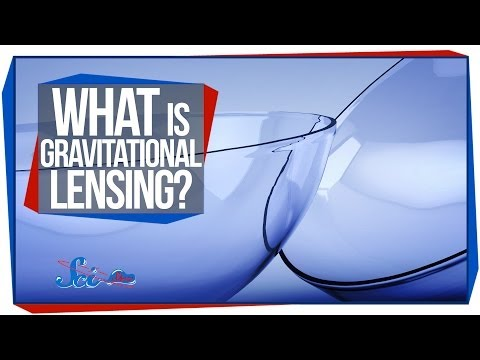

In [4]:
YouTubeVideo('VeAVmp9MLH4', width=800, height=400)

The above video may not work for you if you are using an [IDE](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Integrated_development_environment&ved=2ahUKEwjT2_uJ4OOIAxU1MNAFHU52DUAQFnoECBgQAQ&usg=AOvVaw26G_hSQrwphgc0qRbOs_Ur). Try clicking this [link](https://www.youtube.com/watch?v=VeAVmp9MLH4) to open it in a browser.

If you are still having issues, consider openning this notebook in a browser by running

```bash
(TheGuide) Notebooks$ jupyter notebook
```

or

```bash
(TheGuide) Notebooks$ jupyter lab
```

from the Notebooks directory.

## 1. What is Microlensing?



Microlensing is a specific example of gravitational lensing, where the apparent separation of the lensed images is small enough (i.e., microarcseconds) that they cannot be resolved into individual images with current technology. 

In photometric observations, this means that the entire ["strong" lensing effect](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://simple.wikipedia.org/wiki/Gravitational_lensing%23Strong_lensing&ved=2ahUKEwjsyb_F3-OIAxXxHNAFHaaTLZMQ0gIoAXoECBcQAg&usg=AOvVaw0tyN7JqdXk--HO8mbR53fG) is contained within what appears to be a single star or [point-spread function (PSF)](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Point_spread_function&ved=2ahUKEwjlstDo3-OIAxVLLtAFHVG-FWYQFnoECAkQAQ&usg=AOvVaw2xNwJtwWWTn-egxItIx4sM). The lensing can instead be observed because of the changing magnification and number of source-star images creating variations in brightness. The brightness increase is transient in nature as the lens and source are moving relative to each other. This effect is called photometric microlensing. 

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/z75aHv9SpVg?si=pkcW9WrT226AkEfh" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

> *In bouts of flagrant hubris, unbecoming of a notebook, I will often refer to photometric microlensing as simply microlensing. Astrometric microlensing is a topic left out in the cold for the duration of this notebook. But should you wish to visit it and ensure it feels loved, you can do so [here](AstrometricMicrolensing.ipynb).*

If we could see the magnified images in a microlensing event forming, they would scoot around paths that trace out the Einstein ring. The event would look something like [this](https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL):

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

Theoretical peak magnification $A_{\rm peak}$, for a simple microlensing event, occurs when the lens and source are most closely aligned, with an angular separation of $u_0$, at time $t_0$. The intensity of an event's $A_{\rm peak}$ depends on how closely the source aligns with the lens (i.e., how small $u_0$ is) and the angular size ($\rho$) of the source, proportional to the angular size of the Einstein ring, $\theta_{\rm E}$. The time taken to shift lens-source relative positions by $\theta_{\rm E}$ is $t_{\rm E}$, which is a proxy for lens-source relative [proper motion](https://en.wikipedia.org/wiki/Proper_motion). 

This angular-separation dependence of the magnification is demonstrated in this figure. 

| ![SL](./Assets/single_trajectories_FS.png) |
| :-: |
| *Left:* Example trajectory diagram in the lens plane, showing set of source trajectories (purple) with varying $u_0$. The lens object position is plotted as a red, filled circle. The scale of the caustic diagram is in units of $\theta_{\rm E}$, and the Einstein ring, about which source images form, is indicated by the dashed grey circle. The angular source size ($\rho=0.05$) and relative trajectory direction are indicated by the circle and arrow on the trajectory lines, respectively. *Right:* Corresponding magnification curves, given the trajectories shown on the diagram (*left*), where $\tau$ is the time, relative to $t_0$, scaled by $t_{\rm E}$. |

A larger $u_0$ means a lower $A_{\rm peak}$ and larger $\rho$ means the magnification curve is more smoothed. This smoothing is termed the ``finite-source effect.'' Theoretically, for a point source ($\rho=0$), $A_{\rm peak}=\infty$ if $u_0=0$. The basic shape of the lightcurves of these point-source-like events is referred to as a Paczynski curve.

If none of that sunk in, don't worry. You'll start to get a feel for it as we move through some examples. We will also learn how to make a figure like the one shown above in the Notebook [SingleLens.ipynb](SingleLens.ipynb).

The slider below alows you to change the physical parameters of a lensing "event" to see how these changes in physical parameters affect the size of the einstein ring.

> For quick conversions, it is worth noting that Sun is about 1000 times the mass of Jupiter. So the mass of Jupiter is like one milli-solar masses. 
> The duterium fusion limit is at about 10 Jupiter masses or 0.01 solar masses. 
> The hydrogen fusion limit is around 100 Jupiter masses or 0.1 solar masses.

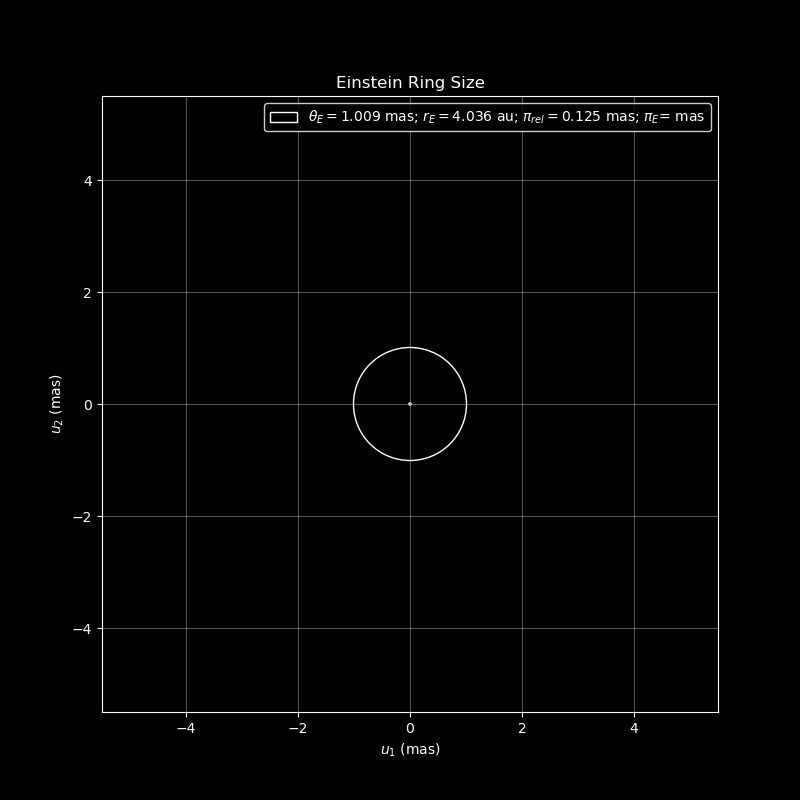

In [5]:
# Interactive Angular Eistein Ring Radius Plot

# If the plot does not present correctly in the notebook, try rerunning the cell.

theta_E_max = 5.5  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(1)  # Close the previous figure if it exists
fig, ax = plt.subplots(num=1, figsize=(8, 8))

# Set plot background and text colors
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M: float, Dl: float, Ds: float) -> None:
    """
    Update the plot with the given lensing system parameters.

    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    """

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    r_E_au = theta_E_value * Dl  # au
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax.cla()  # Clear only the current axes

    fig.patch.set_facecolor('black')  # Set the figure background color to black

    # Plot the circles  # ADD PIE!
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', alpha=1.0, 
                    label=r'$\theta_E=$%3.3f mas; $r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E$= mas' %(theta_E_value, r_E_au, pi_rel))
    ax.add_patch(circle) 

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = 0.00465 au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = 10
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax.add_patch(star)
    np.save('multiplication_factor.npy', bigger)

    # Set text colot to white
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.title.set_color('white')

    # Set labels and title
    ax.set_xlabel(r'$u_1$ (mas)')
    ax.set_ylabel(r'$u_2$ (mas)')
    ax.set_title('Einstein Ring Size')

    # Add a white grid
    ax.grid(True, color='darkgrey', alpha=0.5)

    # Set axis to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set the limits to a fixed range for simplicity
    ax.set_xlim(-theta_E_max, theta_E_max)
    ax.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

# Function to update the Ds slider's minimum value based on Dl
def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='Mass (M_sun)')
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=1.0, max=10.0, step=0.1, description='Lens Distance (kpc)')
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, description='Source Distance (kpc)')
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)


<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 1</h2>
    <p>If you went through the code for this plot, you may have noticed that the size of the lens star has been exaggerated. By what factor is the display star's angular radius too big?</p>
    <br>
    <p><i>Wrtie you answer in the cell below.</i></p>
    <br>
</div>

In [6]:
answer = 0  # replace this value with your answer

if answer == np.load('multiplication_factor.npy'):
    print('Correct!')
else:
    print('Not quite. Try again.')

Not quite. Try again.


The plot below gives us an intuition for the scale of this angular Eintstein radius in both the lens and projected onto the source plane.

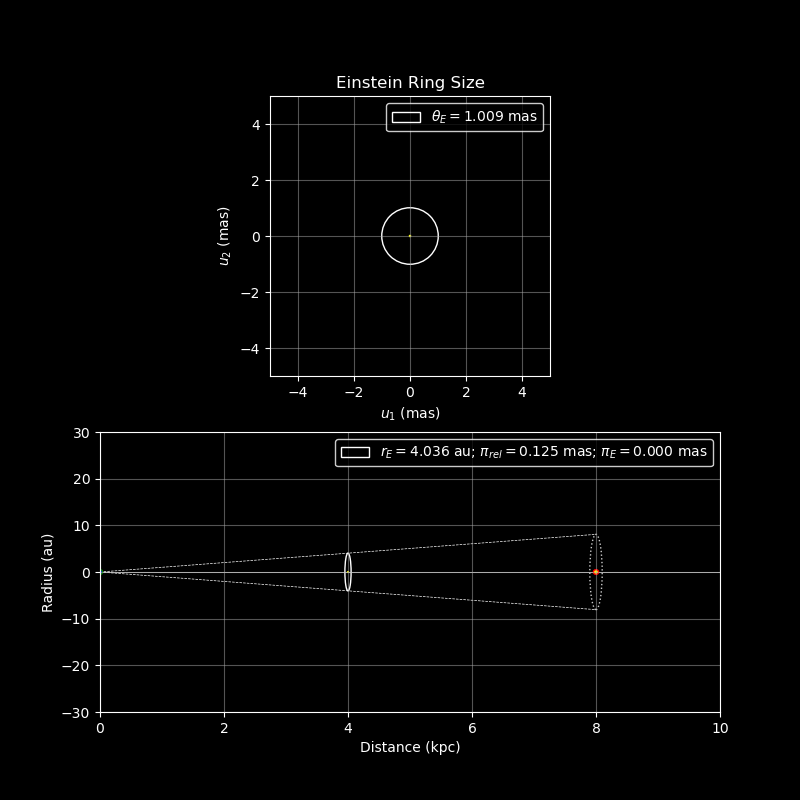

In [7]:
# interactive Einstein radius plot; angular, physical, and projected into the lens plane.

theta_E_max = 5.0  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(2)  # Close the previous figure, if it exists
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), num=2)

fig.patch.set_facecolor('black')  # Set the figure background color to black

# Main plot: Einstein ring
#--------------------------

# Set plot background and text colors
ax1.set_facecolor('black')
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')

# Add a white grid
ax1.grid(True, color='darkgrey', alpha=0.5)

# Set axis to be equal
ax1.set_aspect('equal', adjustable='box')

# Secondary plot: Distance vs. Radius
#------------------------------------

# Set plot background and text colors
ax2.set_facecolor('black')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')

# Add a white grid
ax2.grid(True, color='darkgrey', alpha=0.5)

# Set axis limits
ax2.set_xlim(0, 10)
ax2.set_ylim(-30,  30)
ratio = 5/60  # Full height half width of plot axis 2

ax2.set_xlabel('test label')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M, Dl, Ds):

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!
    r_E_au = Dl * theta_E_value  # au
    pi_E = 0.0  # mas   # DO THIS!

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax1.cla()  # Clear only the current axes
    ax2.cla()  # Clear only the current axes

    # Main plot: Einstein ring
    #--------------------------

    ax1.yaxis.label.set_color('white')
    ax1.xaxis.label.set_color('white')
    ax1.title.set_color('white')

    # Plot the circles
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', 
                    alpha=1.0, label=r'$\theta_E=$%3.3f mas' %theta_E_value)
    ax1.add_patch(circle)

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = ... au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = np.load('multiplication_factor.npy')
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax1.add_patch(star)

    # Set the limits to a fixed range for simplicity
    ax1.set_xlim(-theta_E_max, theta_E_max)
    ax1.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Add a white grid
    ax1.grid(True, color='darkgrey', alpha=0.5)

    # Set labels and title
    ax1.set_xlabel(r'$u_1$ (mas)')
    ax1.set_ylabel(r'$u_2$ (mas)')
    ax1.set_title('Einstein Ring Size')

    # Secondary plot: Distance vs. Radius
    #------------------------------------

    ax2.yaxis.label.set_color('white')
    ax2.xaxis.label.set_color('white')

    # Plot the lens star
    R_au = R * R_sun2au
    lens_star = Ellipse((Dl, 0), width=(bigger * R_au * 2 * ratio), height=(bigger * R_au * 2), 
                        edgecolor='yellow', facecolor='white')
    lens_star.set_zorder(1)
    ax2.add_patch(lens_star)
    Earth = Ellipse((0, 0), width=(ratio), height=1, edgecolor='green', facecolor='blue')
    Earth.set_zorder(1)
    ax2.add_patch(Earth)
    Source = Ellipse((Ds, 0), width=(ratio), height=1, edgecolor='red', facecolor='yellow')
    Source.set_zorder(1)
    ax2.add_patch(Source)

    # Plot the Einstein ring as an ellipse
    einstein_ring = Ellipse((Dl, 0), width=0.1, height=2 * r_E_au, edgecolor='white', 
                            facecolor='none', alpha=1.0, 
                            label=r'$r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E=$%3.3f mas' %(r_E_au, pi_rel, pi_E))
    ax2.add_patch(einstein_ring)

    # Projected ojnto the source plane
    einstein_ring_proj = Ellipse((Ds, 0), width=(0.1 * Ds / Dl), height=2 * Ds * theta_E_value, 
                                 edgecolor='white', facecolor='none', linestyle='dotted', alpha=0.8)
    ax2.add_patch(einstein_ring_proj)

    # Plot the projection lines
    ax2.plot([0, 10], [0, 0], color='white', linestyle='-', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, -Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)

    # Add a white grid
    ax2.grid(True, color='darkgrey', alpha=0.5)

    # Set axis limits
    ax2.set_xlim(0, 10)
    ax2.set_ylim(-30,  30)

    # Set labels and title
    ax2.set_xlabel('Distance (kpc)')
    ax2.set_ylabel('Radius (au)')

    # Add a legend
    ax2.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
slider_style = {'description_width': '150px'}  # Set the width of the description textboxes
slider_layout = widgets.Layout(width='500px')  # Set the width of the slider bars

M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='Mass (M_sun)', 
                               style=slider_style, layout=slider_layout)
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=0.5, max=10.0, step=0.1, description='Lens Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, description='Source Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

You might also note how, for a given lens distance, the angular Einstein radius is at its smallest when the source-lens distance ($D_S-D_L$) is small. However, larger source-lens distances have diminishing returns in terms of the increase in angular Einstein radius. To demonstrate, we have made a plot of $\theta_E$ vs $D_S-D_L$. The line on this plot represents a fixed $M_L$ and $D_L$ (1 $M_\odot$, 1 kpc). 

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 2</h2>
    <p>Add a few more lines to this plot for various other <i>M</i><sub>L</sub>, <i>D</i><sub>L</sub> combinations.</p>
    <br>
</div>

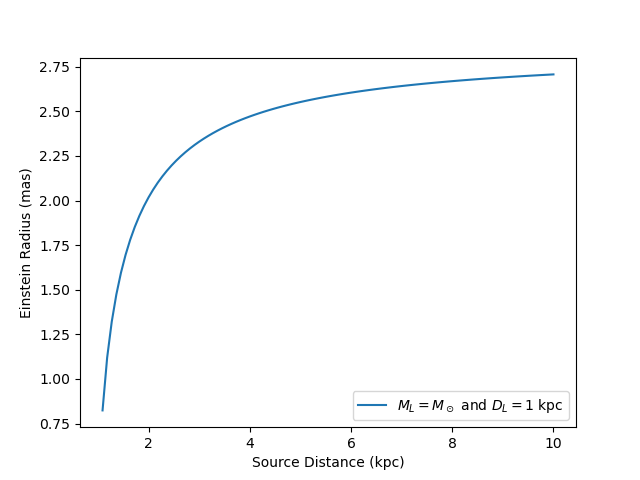

In [8]:
M = 1.0  # M_sun
Dl = 1.0  # kpc
Ds = np.linspace(Dl, 10, 100)  # kpc
Ds = Ds[1:]  # Remove Ds = Dl

theta_E_values = np.array([theta_E(M, Dl, D) for D in Ds])

plt.close(3)  # Close the previous figure, if it exists
plt.figure(3)  # Create a new figure
plt.plot(Ds, theta_E_values, label=r'$M_L=M_\odot$ and $D_L=1$ kpc')
plt.xlabel('Source Distance (kpc)')
plt.ylabel('Einstein Radius (mas)')
plt.legend(loc='lower right')
plt.show()

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 3</h2>
    <p>For a fixed mass and source distance, the Eistein radius (<i>r</i><sub>E</sub>) peaks at <i>D</i><sub>L</sub>=<i>D</i><sub>S</sub>/2. Make a plot of <i>r</i><sub>E</sub> vs <i>D</i><sub>L</sub> for a fixed <i>M</i><sub>L</sub> and <i>D</i><sub>S</sub>.</p>
    <br>
</div>


In [9]:
# Your code goes here

If you are wondering why all of the distances have been restricted to between 0 and 10 kpc, this will become clear once you have completed the notebooks for [Galactic Models](GalacticModels.ipynb) and [Optical Depth](OpticalDepth.ipynb). Put simply, the Galactic center is at about 8 kpc from the Sun and the density of stars is much greater there than it is closer to the Sun. There is another effect the affects plausible source distances and that is the extinction in the field. 

Current, ground-based observing strategies concentrate on fields close to the Galactic center to maximise the number of stars that are visible and therefore the return of observed microlensing events. However, these fields are also impeeded by dust from the plane of the galactic disk. The result is that, ground-based, I- and V-band surveys, do not observe source stars much more distant the the Galactic center, becouase the extinction in these bands, with these pointings, is too high. 

> As of 2024.



## 2. What is it used for?

Because only the source light is magnified in a microlensing event, the luminosity of the lens system does not directly contribute to the event's detectability. As a result, microlensing is uniquely capable when it comes to detecting cold, low-mass, dim lenses, such as brown dwarfs and unbound planetary-mass objects, or massive dark lenses like black holes.


In the case where multiple bound objects make up the lens, the resulting magnification will manifest in a manner related to the event's geometry and the mass ratio of the lens system. This means that secondary (companion) objects in bound orbits around the primary (host) objects within the lens, which may or may not be dim, can also be uncovered. Lenses made up of more than one lens object have more complicated geometries with projected source positions of theoretical infinite magnification (given a point source) called caustic curves, and images that form around critical curves, like the undulating bright lines you see when light passes through turbulent water. A more detailed description of critical and caustic curves and model parameterisations is given in the [Binary Lens](BinaryLens.ipynb) notebook. Events with one source and two lens bodies are referred to as binary lens events. These are the events that typically result in microlensing planet detections.

### 2.1 Exoplanets


The search for, and characterisation of exoplanets, is probably the most popularly understood science goal in microlensing. Although it is not the technique that finds the most exoplanets, it is sensitive to members of planetary populations that other methods are not so sensitive to.

> Exoplanets are planets beyond our solar system.

We can use this notebook to understand the different sensitivities of each method, by loading the mass and semi-major axis for every discovered exoplanet from the Nasa Exoplanet Archive, using *astroquery*.


In [10]:
# Fetch data from NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ps", select="pl_name,pl_bmassj,pl_orbsmax,discoverymethod")
exoplanet_df = query.to_pandas()

# Filter out rows with missing values
exoplanet_df_clean = exoplanet_df.dropna(subset=['pl_bmassj', 'pl_orbsmax']).copy()

# Convert mass from Jupiter masses to Earth masses (1 Jupiter mass = 317.8 Earth masses)
exoplanet_df_clean.loc[:, 'pl_bmasse'] = exoplanet_df_clean['pl_bmassj'] * 317.8

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 4</h2>
    <p>Use the information from the table to draw the solar system planets onto the plot of exoplanet mass vs semi-major axis, in the cell below.</p>
    <br>
</div>

| Planet       | Mass (Earth Masses) | Semi-Major Axis (AU) |
|--------------|---------------------|----------------------|
| Mercury      | 0.055               | 0.387                |
| Venus        | 0.815               | 0.723                |
| Earth        | 1.000               | 1.000                |
| Mars         | 0.107               | 1.524                |
| Jupiter      | 317.8               | 5.204                |
| Saturn       | 95.2                | 9.583                |
| Uranus       | 14.5                | 19.22                |
| Neptune      | 17.1                | 30.05                |



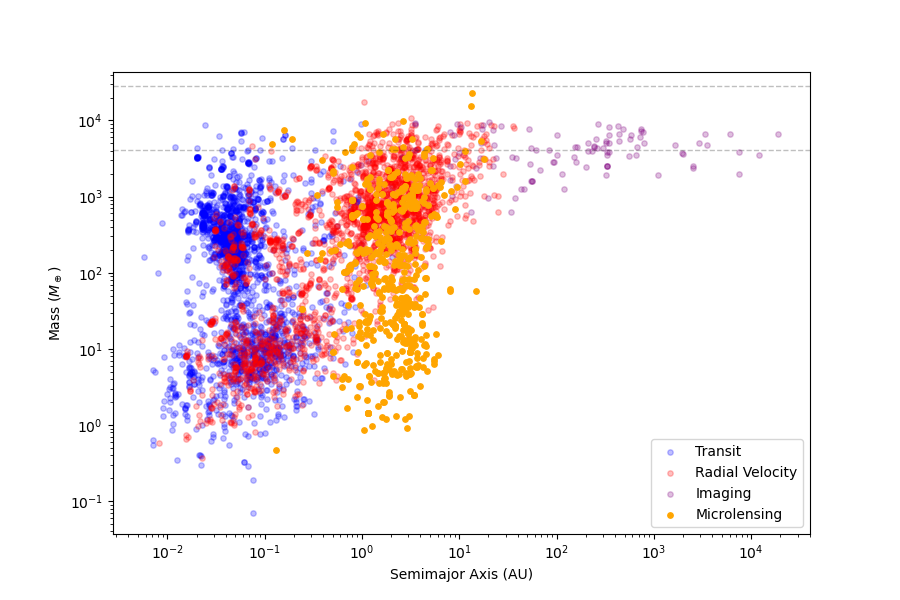

In [11]:
# Plotting
plt.close(4)
plt.figure(num=4, figsize=(9, 6))

# Define colors for different discovery methods
colors = {
    'Transit': 'blue',
    'Radial Velocity': 'red',
    'Imaging': 'purple',
    'Microlensing': 'orange'
}

# Plot each discovery method with different colors
for method, color in colors.items():
    subset = exoplanet_df_clean[exoplanet_df_clean['discoverymethod'] == method]
    if method == 'Microlensing':
        a = 1.0
    else:
        a = 0.25
    plt.scatter(subset['pl_orbsmax'], subset['pl_bmasse'], c=color, label=method, alpha=a, s=15)

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Plot a horizontal line at 13 Jupiter masses (13 * 317.8 Earth masses)
BD = 13 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)
BD = 90 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)

# Labels and title
plt.xlabel(r'Semimajor Axis (AU)')
plt.ylabel(r'Mass ($M_\oplus$)')
plt.legend(loc='lower right')

# Show plot
plt.show()

plt.savefig('exoplanet_plot.png', dpi=300)

The direct imaging method is most sensitive to wider orbit planets. Technology creates a limit as to how close and low mass the planets this method detects can be.

Detection methods such as radial velocity (RV) and transit surveys are far more sensitive to high-mass-ratio, small-orbit companions as they produce more significant and frequent/short-period transit and RV signals.  Because these methods rely on light from the host, they are most sensitive to nearby and/or bright hosts. There is a diagonal break in the above plot that demonstrates parameter space where these methods lose sensitivity.

> The RV exoplanet detection method uses time-series, Doppler measurements of a host star to identify the co-orbital "wiggle" caused by a planetary companion.

> The transit method for detecting exoplanets requires a line-of-sight alignment between the exoplanet and its host star.  The exoplanet blocks some of the light from the host-star and causes a characteristic "U" shaped dip in the host star's lightcurve.

The microlensing detection rate is not dependent on orbital frequency; the events are stochastic and unique. It is the projected separation, $s$, at the time of the event that is influential in its detection, not the orbital period. The microlensing method is most sensitive to a projected separation of lens-masses of around $1\,r_E$; peak sensitivity with this method is beyond the snow line (see, for example, [Gaudi 2012]()). Unreliant on light from the host, microlensing is unique in its ability to unveil exoplanets that are located at considerable distances from us and around a wide variety of host stars. Technology and observing stratergies create limits on how low mass and far from the Einstein ring these planets can be. See the notebook [Optical Depth](OpticalDepth.ipynb) for more on microlensing detection efficiency. 

> The snow line is the orbital radius, about a star, at which water ice sublimates.

The different sensitivies of the microlensing and direct imaging methods help us to understand the dominating role the detection sensitivites are having on current populating of this plot. There is still a large area of this plot for which our current detection methods are insensitive. This is emphasised by the location of solar-system planets, which are largely outside of current sensitivty regions. If we assume that the solar-system is a somewhat typical planetary system then it seems we are not sensitive to what should be the most densly populated regions of this parameter space.

With its broad detection sensitivities, microlensing has expanded our understanding of planetary systems through reduced biases in population studies. The deterministic inference of planet population distributions from microlensing is proposed in [Dominik et al. (2010)](). This idea was applied in practice in [Cassan et al. (2012)](), (described in further detail in their [thesis]()) using photometry from the Probing Lensing Anomalies NETwork (PLANET; [Albrow et al. 1998]()) and presenting the well-known conclusion: 
   
<h5> <ul> <i>"One or more bound planets per Milky Way star."</i> </ul> </h5>

A more detailed study of bound planetary statistics, using microlensing, was performed on the MOA (Microlensing Observations in Astrophysics; [Sako et al. (2008)]()) survey data and presented in \cite{Suzuki2016}. They found a broken-power-law mass-ratio function best described the empirical data. This broken power-law was significantly favoured over the unbroken power-law and the break was at $q_{br} = 1.7\times10^{-4}$. Their broken power-law mass-ratio function shown in their Figure 13, which also displays the [Cassan et al. (2012)](), power-law mass-ratio function. These findings disagree with the [core-accretion]() planet-formation theory [(Pollack et al., 1996)](), particularly in the number of failed gas-giant cores.

A sample of planetary microlensing events can, in theory, be used to determine how the number of planets per star changes with Galactic position. [Penny et al. (2016)]() pioneered these investigations, but with results that were highly dependent on a small number of parallax measurements ($\pi_{\rm E}$), mostly from ground-only sources, which have biases towards high-parallaxes and long-timescales (and thus lower relative proper motions). This relative proper motion bias is very obvious in their Figure 3, where most samples clump down the low-proper-motion end of the distribution. 

> The timescale refers to the "duration" of an event. However, defining the beginning and end of a microlensing event is a nebulous concept, so we instead refer to the Einstein time, $t_{\rm E}$, of an event as its timescale. $t_{\rm E}$ is defined as the time it takes for a source (projected onto the lens plane and in the reference frame where the lens is at rest) to traverse an Einstein ring radius.

The likely combination of these two biases is that, the high parallax favours close lenses, and the low proper motion bias favours sources from the same kinematic sample (i.e., a disk lens favours a disk source). Of the two high proper-motion events for which mass was measured, one (MOA-2013-BLG-220) was not measured using parallax and is therefore not subject to the same biases. The other, OGLE-2013-BLG-0341, belongs to a rare class of very-low-$q$ events (as modelled in [Jung et al., 2019[]) with planetary caustic crossings that were observed purely because of the high fidelity imaging of the first generation of microlensing. This is not a sensitivity that is seen in the survey-dominated generation's data ([Gould et al., 2020]()). All evidence points towards a poor understanding of microlensing's sensitivity at very-low-$q$ (approximately sub-Neptune planetary mass), especially in the specific context of different strategies. 

> Planetary caustics are small features in the source plane of planetary events, that correspond to the alignments of highest magnification. See the [Binary Lens](BinaryLens.ipynb) notebook for more on caustics.
> See the section on [Microlensing Eras](#3-microlensing-eras) for a detailed description of microlensing generations and their distinct observational methods.
> The contributions of this generation to the very-low-$q$ regime detections involve central or resonant caustic crossings, which are of larger relative size and are more predictable in occurrence than planetary caustic crossings.

The results of [Penny at al. (2016)]() are subject to too many unmitigated biases and incorrectly classified events (e.g., OGLE-2013-BLG-0723; [Albrow et al., 2000]() [Jung et al., 2013]()) to be able to put much faith in their tentative proposal that disk stars are more likely to host planets than bulge stars. Instead what we learn is that ground-based parallax measurements have a strong bias towards close, low-proper-motion lenses and that Bayesian lens distance estimates appear to under-predict bulge lenses and lenses with very small distances from the Sun.

> The "bulge" refers to the population of old, kinematically-hot stars around the Galactic centre at radii of $R\lesssim4\,\rm{kpc}$. The "disk" is the younger population of stars that co-rotates in a disk around the Galactic centre and extends to $R\lesssim15\,\rm{kpc}$. See the [Galactic Model](GalacticModel.ipynb) for more on Galactic structure.

[Koshimoto et al. (2021)]() performed a very different analysis on essentially the same set of events. Their analysis was also concerned with a radial dependence on planet hosting but was centred on the use of microlensing parameter rather than parameters that are inferred or determined through the higher-order effects, which are subject to more complicated sensitivities. They found that a star's probability of hosting planets may have a small dependence on the galactic radius of the system, and that the bulge does host planets.

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 5</h2>
    <p>We have created a histogram of distance from the Sun of the <i>current</i> catalogue of microlensing exoplanets. How does this compare with exectation from Penney et al. (2016)?</p>
    <br>
    <p> Amber: Read the values off of the penny plot (red line) and make it an array here </p>
    <br>
</div>

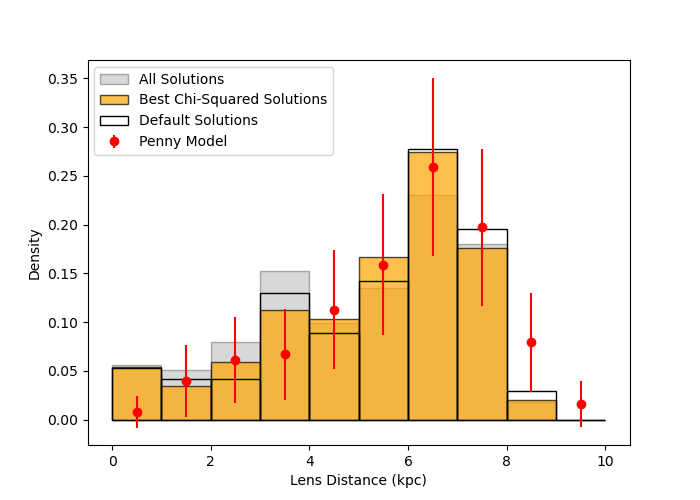

In [26]:
# Fetch data from the ML table in NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,sy_dist,ml_modeldef,ml_modelchisq")
ML_df = query.to_pandas()

# Filter out rows with missing values and create a copy of the DataFrame
microlensing_df_clean = ML_df.dropna(subset=['sy_dist', 'ml_modelchisq']).copy()

# Convert distances from parsecs to kiloparsecs
microlensing_df_clean['sy_dist_kpc'] = microlensing_df_clean['sy_dist'] / 1000.0

# Identify the degenerate solutions with the lowest ml_modelchisq for each pl_name
microlensing_df_best_chisq = microlensing_df_clean.loc[microlensing_df_clean.groupby('pl_name')['ml_modelchisq'].idxmin()]

# Filter for entries with ml_modeldef = 1
microlensing_df_default = microlensing_df_clean[microlensing_df_clean['ml_modeldef'] == 1]


# Calculate histograms
bins = np.linspace(0, 10, 11)
all_hist, _ = np.histogram(microlensing_df_clean['sy_dist_kpc'], bins=bins, density=True)
best_chisq_hist, _ = np.histogram(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, density=True)
default_hist, _ = np.histogram(microlensing_df_default['sy_dist_kpc'], bins=bins, density=True)

# Calculate density difference
density_difference_best_chisq = best_chisq_hist - all_hist
density_difference_default = default_hist - all_hist

# Plotting the histograms
plt.close(5)
plt.figure(num=5, figsize=(7, 5))
plt.hist(microlensing_df_clean['sy_dist_kpc'], bins=bins, color='grey', edgecolor='black', alpha=0.3, density=True, label='All Solutions')
plt.hist(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, color='orange', edgecolor='black', alpha=0.7, density=True, label='Best Chi-Squared Solutions')
plt.hist(microlensing_df_default['sy_dist_kpc'], bins=bins, facecolor='none', edgecolor='black', alpha=1.0, density=True, label='Default Solutions')

# Plotting the density difference
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#plt.plot(bin_centers, density_difference_best_chisq, marker='o', color='black', label='Density Difference (Best Chi-Squared)')
#plt.plot(bin_centers, density_difference_default, marker='x', color='black', label='Density Difference (Default)')

# Adding Penny Errorbars
penny_model_df = pd.read_csv('Data/Penny2016F1-model.csv', header=0, skipinitialspace=True)
normalise = penny_model_df['f'].sum()
plt.errorbar(penny_model_df['D_L'], penny_model_df['f']/normalise, yerr=penny_model_df['f_err']/normalise, fmt='o', color='red', label='Penny Model')

# Labels and title
plt.xlabel('Lens Distance (kpc)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

# Save plot
plt.savefig('microlensing_lens_distance_histogram_density_difference.png', dpi=300)

From this plot we can see that, more often than not, the default solution and lowest $\chi^2$ solution are a more distant degenerate solution. The oversized peak in the all-solutions lens-distance distribution at 4 kpc appears to be an artificat created by degenerate solutions to common ~6 kpc lenes. This artefact is mostly resolved when including only the lowest $\chi2$ solutions. 

In [13]:
split_index=5  # Split the data into close and far regions at 5 kpc

close_best_chisq = density_difference_best_chisq[:split_index]
far_best_chisq = density_difference_best_chisq[split_index:]
close_default = density_difference_default[:split_index]
far_default = density_difference_default[split_index:]

density_difference = pd.DataFrame({'best_chisq':[np.sum(close_best_chisq), np.sum(far_best_chisq)], 
                                   'default':[np.sum(close_default), np.sum(far_default)]}, 
                                   index=['close', 'far'])

density_difference

,best_chisq,default
close,-0.074305,-0.082021
far,0.074305,0.082021


In [14]:
# What do the nodeldef and modelchisq columns represent?

event_index = 1  # Change this index to select a different event

multiple_entries = ML_df[ML_df.duplicated(subset=['pl_name'], keep=False)]
pl_name_with_multiple_entries = multiple_entries['pl_name'].iloc[event_index] 
print(f"Planet with multiple entries: {pl_name_with_multiple_entries}")
print(multiple_entries[multiple_entries['pl_name'] == pl_name_with_multiple_entries])


Planet with multiple entries: MOA-2013-BLG-605L b
                 pl_name  sy_dist  ml_modeldef  ml_modelchisq
1    MOA-2013-BLG-605L b   3550.0            0       15160.20
75   MOA-2013-BLG-605L b    850.0            1       15153.75
102  MOA-2013-BLG-605L b    860.0            0       15156.24
162  MOA-2013-BLG-605L b   3590.0            0       15166.40
317  MOA-2013-BLG-605L b   1920.0            0       15159.58
332  MOA-2013-BLG-605L b   1760.0            0       15161.85


But why are the distributions different?



The microlensing method has revealed a diverse array of exoplanets, from high-$q$ gas-giants to lonely Earth-sized worlds. This diversity of systems broadens our understanding of the many ways in which stars and planets interact within our galaxy, and even speaks to the plausibility of planetary formation theories.

A prime example of this diversity is given in microlensing event OGLE-2016-BLG-1928 [Mroz et al. (2020)](). This was a single-lens event with an extremely small timescale ($t_{\rm E} = 40\,{\rm min}$); the event had a decisively planetary-mass lens without an obvious host star. This type of exoplanet is known as a free-floating planet (FFP). Its mass was estimated at a likely $0.3 \,M_\oplus$, which would make it the smallest microlensing FFP, to date. OGLE-2016-BLG-1928 is thought to have formed around a host star, having later been ejected from its birth system after a dynamical squabble with a sibling planet; i.e., through planet-planet scattering. It must be noted that, for this and all other microlensing FFPs, the possibility of the lens actually being a wide-orbit, bound planet cannot be ruled out. Instead, the general practice is to consider just how wide the planet must be from any potential bound host, at a minimum, given that the host has not been detected. For example, [Mroz et al. (2020)]() give a lower limit on the projected host separation, for OGLE-2016-BLG-1928, of $\sim8.0\,\rm{au}$.

> FFPs are often more colloquially know as "rouge planets" in scientific media.


Microlensing, unlike RV, transit, and direct imaging methods, is sensitive to low-mass and/or dim hosts due to the lens-system luminosity not influencing the source-star magnification of a microlensing event. [Paczynski (1986)]() proposed that microlensing could prove uniquely sensitive to FFPs that are non-local and/or no longer in their youth. This has been proven with the observations of the eight FFPs listed in Table 1. While the masses given for these planets are merely estimates based on assumptions about disk or bulge membership, their characterisation as *planets* (or rather, of planet-like mass), in the broad sense, is far more certain.

There are numerous other mechanisms through which FFPs are thought to come about (see \citealt{2023PopulationStudiesReview} and references therein). These include: 
* forming like a star through gravitational collapse, 
* failed star embryos, and 
* ejection after normal planet formation. 

The leading theories for planetary formation mechanisms are core accretion \citep{CoreAccretion} and disk instability \cite{DiskInstability}. Possible ejection processes include:
* gravitational instability in the protoplanetary disk, 
* planet-planet scattering, 
* post-main-sequence evolution processes in the host, 
* dynamical interactions in binary or multiple-star host systems, 
* stellar fly-bys, 
* or dynamical interactions within a star cluster or star-forming region. 

It is possible for very young nearby FFPs, which are yet to cool after their formation, to be directly observed. This is shown through direct-imaging observations of large, gas FFPs found in Orion \citep{lucas2000population}. However, limitations in age and distance mean that population inferences from direct imaging samples are heavily biased. In contrast, \cite{Gould2022FFPs} demonstrated that the distribution of angular Einstein radii ($\theta_{\rm E}$) of the events observed by KMTNet is consistent with a power-law distribution of masses of FFP candidates. /* reword this. I think it is mostly plagerised */
Furthermore, \cite{2023PopulationStudiesReview} summarised that, according to microlensing population studies (e.g., \citealt{Mroz2017}; \citealt{Gould2022FFPs}; \citealt{Sumi2023}), FFPs, if indeed unbound, may be more common than gravitationally-bound exoplanets. 

### 2.2 Brown Dwarf


### 2.3 Black Holes and other Remnants


### 2.4 Stellar Population Models


### 2.5 Dark Matter



## 3. Microlensing Eras


<a id="next-steps"></a>
## Next Steps

Oh hey, you're finished! Well done. 





The next notebook I recommend you try is:

- [Microlensing Geometries - Amber and Scott](microlensingGeometries.ipynb)

But these would also be good choices:
- Higher-Order Effects - Amber and Scott 
- Data Reduction - Michael
- Simulations - Samson
- Modelling - Amber
- The Galactic Model - Macey
- The Nancy Grace Roman Space Telescope - Scott

If none of those tickle you fancy, try picking any one of the other notebooks within the `notebook` directory. 